# **Topic : AI model to detect medical insurance fraud**
dataset : https://www.kaggle.com/datasets/nyashachizampeni/medical-insurance-claim-fraud

여기에다가 15개의 열 중 어떤 내용을 추가하고 뺄 것인지 작성
-> 둘다 별로라고 한 부분 지워버림!!

(참고하기 위한 메모)우리주제는 의료보험 사기 탐지로 위 데이터의 내용을 보면 보험을 청구한 정보들이 담겨있고 마지막 열인 lable에서 0은 클린 1은 사기 의미

gender: 성별에 따라 의료보험 사기 칠 가능성도 있어보임.. O ..? -> 나중에 어떤 성별이 몇퍼센트로 사기에 더 높은 비중을 차지한다 하려면 있어야 함

location: 위치를 보고 어떤 위치에서 사기가 높게 나오는 편임을 파악하기 위함 O -> 굿

patient_dob: 환자 생년월일인데 ,, 년도만 가져오는 것은 좋은데 가능할지.. -> 계산 수식에 넣고 나이로 변환해서 나이 데이터를 학습 데이터에 추가하자!

cause:사고 원인을 나타낸 것으로 필요하다고 생 -> 굿 사기 이용자들이 주로 어떤 핑계를 대더라로 사용 가능

Fee Charged: 부과되는 수수료 -> 필요

membership_period: 멤버십 기간 O -> 필요

number_of_claims: 청구 수 O -> 필요

number_of_dependants: 부양가족 수를 의미 .. 필요 x 하지않을까 생각함 ->음 필요하려나 일단 넣어도 될 듯

label: 사기인지 아닌지의 결과로 0일 경우 진실, 1일 경우 사기를 나타냄

------------------------------------------------

정리된 데이터들 상대로 우리가 사용해야할 라이브러리들 정리했어요!!

1. pandas: 데이터 전처리랑 데이터프레임 생성들 여러모로 필수적!!
2. matplotlib이나 seaborn: 어떤 성별이나 지역에서 사기비율이 높은지 시각화하려면 필수!
3. scikit-learn: 머신러닝 라이브러리로 데이터 분할, 모델링하기랑 나중에 모델 평가하는 역할
4. XG-Boost: 다들 왜 이걸 쓰나 했더니 이 모델이 사기 탐지할 때 주로 쓰이는 모델로 사기 탐지에 고성능이라고 하네용
5. logistic-regression: 단순하고 해석하기 쉬움
6. Imbalanced-learn에서 SMOTE 임포트: 이게 데이터 불균형 처리하는 애들이라는데 예를들어 사기친 비율이 5%, 사기 안 친 애들이 95%라면 ai 모델이 성능 높이려고 무작정 얘는 사기 안 친 애입니다! 라고 할 수가 있어서 인위적으로 학습 수를 올려서 그런 불균형을 해소하는 라이브러리라고 하네요

In [ ]:
# 코랩 환경 초기 설정 // !pip는 필요한 특정 라이브러리를 설치하는 명령어
!pip install pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn  kaggle numpy
# Kaggle API로 데이터 셋 불러오기 위한 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Permission Warning 방지용
# Kaggle로 데이터셋 다운로드 및 압축 해제
!rm medical_aid_claims.csv # -> 기존 컴퓨터 csv데이터 셋 파일이랑 중복이 되어서 우선 기존 파일 지우고 다시 다운받도록 코드 수정했습니다.
!kaggle datasets download -d nyashachizampeni/medical-insurance-claim-fraud --force
!unzip -q medical-insurance-claim-fraud.zip

# 필수 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # 학습용 데이터랑 테스트용 데이터랑 나누는 작업, 과적합 방지를 위함
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # 모델 성능을 텍스트 형식으로 보여주는 것
from sklearn.preprocessing import StandardScaler # 데이터 값들끼리 차이가 클 때 스케일링으로 규모 차이를 줄여주는 역할하는 것
from imblearn.over_sampling import SMOTE

# 데이터셋 CSV 파일 읽기 // df: 데이터 프레임의 약자 그리고 이건 테이블 형식이다. 데이터 읽기는 테이블형식으로 가능함
df = pd.read_csv("medical_aid_claims.csv",  sep = ",")
df.shape # 데이터 크기 알기
df.head() # 데이터 상위 3줄 보여주기

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
rm: cannot remove 'medical_aid_claims.csv': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nyashachizampeni/medical-insurance-claim-fraud
License(s): unknown
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 39.1MB/s]


,member-name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,9/11/1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,7/3/1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1


In [ ]:
# 결측값 찾기
df.isna().sum()

,0
member-name,0
email,0
gender,0
location,0
employer,0
relationship,0
patient_name,0
patient_suffix,0
patient_dob,0
cause,0


### *데이터프레임의 각 열에 있는 고유 값의 발생 빈도를 계산*

In [ ]:
#len(df) # -> 7000 와 우리 데이터 자동차 보험사기보다 7배 많은거 였네 굿잡
for _ in df.columns:
  print(df[_].value_counts())

member-name
Konde          318
Sithole        314
Gweta          313
Evans          306
Sibanda        303
Chisa          302
Chipi          298
Chisa Chisi    297
Chiri          295
Femba          293
Geta           292
Dihwa          290
Tichaona       290
Mabhena        289
Moyo           285
Mirwa          284
Nyoni          283
Peterson       283
Foto           282
Jembwa         281
Gute           281
Samvura        275
Gura           275
Bima           271
Name: count, dtype: int64
email
ajimmison0@sun.com              1
bastonif@geocities.com          1
smcmoniesiq@biblegateway.com    1
mhalewoodip@phoca.cz            1
rplumbleyio@usda.gov            1
                               ..
gmorlon95@economist.com         1
mforster94@newyorker.com        1
jmatson93@ning.com              1
pfenemore92@facebook.com        1
wlantrr@quantcast.com           1
Name: count, Length: 7000, dtype: int64
gender
male      3584
female    3416
Name: count, dtype: int64
location
Marondera    6

자동차 보험사기에 보면 사기인것과 아닌 그래프를 겹쳐서 비교하던데 우리는 너~무 사기 아닌게 많아서 안 하겠슴다
예: 사기 건수 120건 사기 아닌 건수 500건

In [ ]:
# --- 데이터 전처리 ---
# 'patient_dob'에서 나이 추출
from datetime import datetime # 나이 추출용
current_year = datetime.now().year
df['age'] = current_year - pd.to_datetime(df['patient_dob']).dt.year


# 'Fee Charged'를 'fee-charged'로 열 이름 변경
df.rename(columns={'Fee Charged': 'fee_charged'}, inplace=True)


# 학습에 사용할 특징 선택
features = ['gender', 'location', 'age', 'cause', 'fee_charged',
            'membership_period', 'number_of_claims', 'number_of_dependants']


# 원-핫 인코딩으로 범주형 변수 처리 // 성별, 지역, 병명은 문자열 데이터로 원핫 인코딩을 통해 숫자형 데이터로 변경해주기
X = df[features] # X값에 특징 저장
X = pd.get_dummies(X, columns=['gender', 'location', 'cause'], drop_first=True)
# 다중공선성여부 파악 필요

# Y값에 사기여부를 저장
y = df['label']

# 데이터 분할 // 80%는 학습용, 20%는 테스트용으로 분할하여 과적합 방지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 // 평균 0, 표준편차 1로 변환하여 데이터 준비 완료!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 데이터 불균형 해소 (사기 청구 데이터 수가 너무 적어서)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

df[features] # 사용할 데이터 열만 가지고 테이블화

,gender,location,age,cause,fee_charged,membership_period,number_of_claims,number_of_dependants
0,female,Kwekwe,28,Other,3798,1541,2,4
1,female,Marondera,33,Other,48905,8269,4,3
2,female,Rusape,26,Road Traffic Accident,39963,6223,2,2
3,female,Rusape,47,Road Traffic Accident,34948,8832,6,3
4,female,Bulawayo,33,Accident At Work,46984,8804,1,2
...,...,...,...,...,...,...,...,...
6995,male,Kwekwe,41,Other,25308,6478,4,3
6996,male,Gweru,39,Accident At Home,32895,438,1,1
6997,male,Rusape,45,Accident At Home,19082,8134,3,1
6998,female,Gweru,24,Other,31717,8293,4,3


# 다중공선성이란??
< 예제 데이터 프레임 >

df = pd.DataFrame(*{'Gender': ['Male', 'Female', 'Male', 'Female']}*)

get_dummies() 함수를 사용하여 더미 변수 생성 (drop_first=True)
df_dummies = pd.get_dummies(df['Gender'], drop_first=True)

print(df_dummies)
이 코드에서 drop_first=True로 설정하여 첫 번째 범주인 'Male'에 해당하는 더미 변수를 삭제하면 결과적으로 'Male'이 1이면 'Female'은 자동으로 0이 되는 더미 변수가 생성된다.

공부한 사이트 : https://velog.io/@edwinjungwoo/getdummies%EC%99%80-dropfirstTrue

<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-44b07f2252c3>:8: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

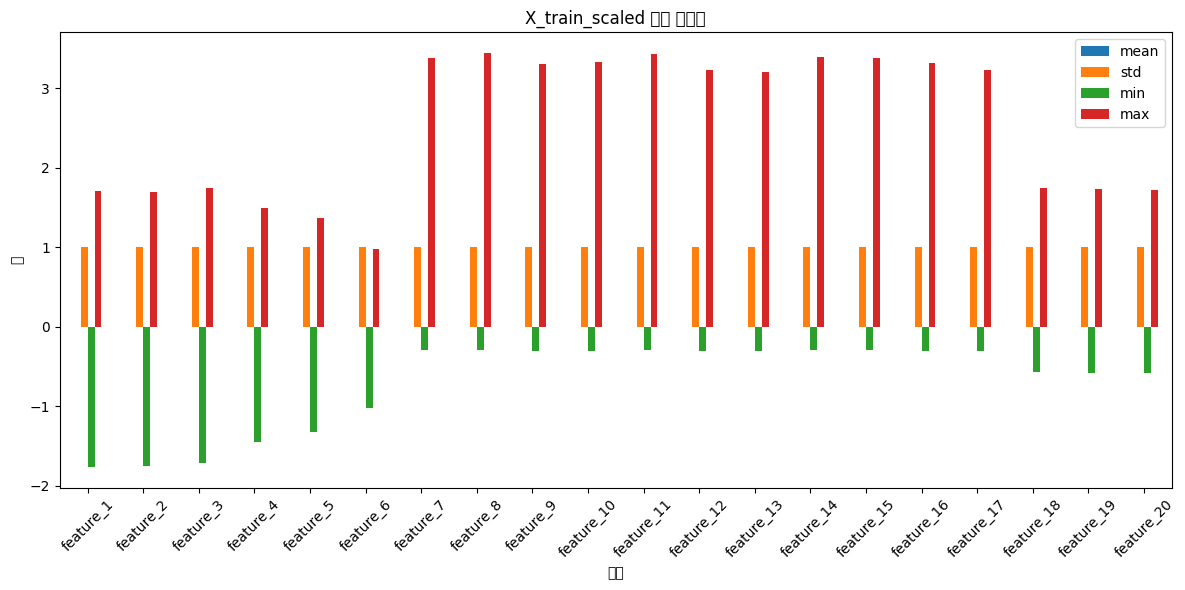

In [ ]:
# 기본 통계량 시각화 // 오호 이걸로 스케일링 얼마나 잘 되었나 확인도 할 수 있고 데이터 이해할 수 있군요!
plt.figure(figsize=(12, 6))
pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(1, X_train_scaled.shape[1] + 1)]).describe().T[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(12, 6))
plt.title('X_train_scaled 기본 통계량')
plt.ylabel('값')
plt.xlabel('특성')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random Forest 모델
*전체 예측 중 81%만 정확함*

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1131
           1       0.20      0.00      0.01       269

    accuracy                           0.81      1400
   macro avg       0.50      0.50      0.45      1400
weighted avg       0.69      0.81      0.72      1400

[[1127    4]
 [ 268    1]]


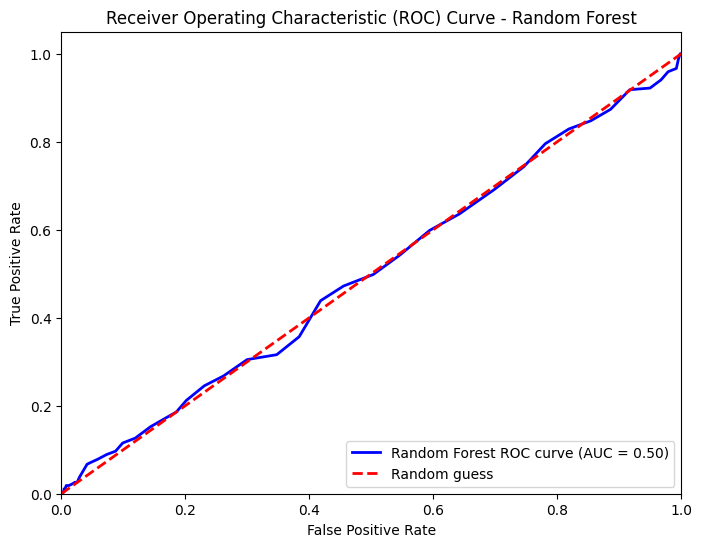

Random Forest AUC: 0.5000


In [ ]:
from sklearn.ensemble import RandomForestClassifier # 솔직히 랜덤포레스트 있어야 하는지 모르겠는데 혹시 사용할 수도 있어서 일단 임포트
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100개의 결정 트리로 모델 생성

# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred = rf_model.predict(X_test_scaled)

# 모델 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest 모델의 예측 확률 계산
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# ROC 곡선을 위한 FPR, TPR 계산
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# AUC 점수 계산
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {auc_rf:.4f}")


Random forest 모델에서 특성 중요도 알아보기

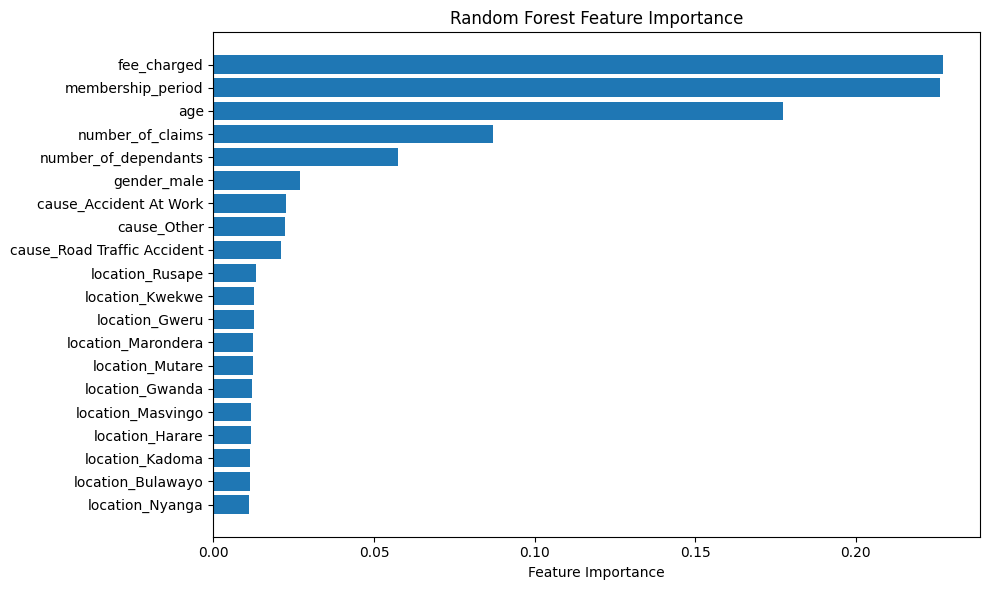

In [ ]:
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# XG Boost 모델
*전체 정확도 79%*

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

accuracy_score(y_pred_xgb, y_test)

0.785

XG Boost 특성 중요도

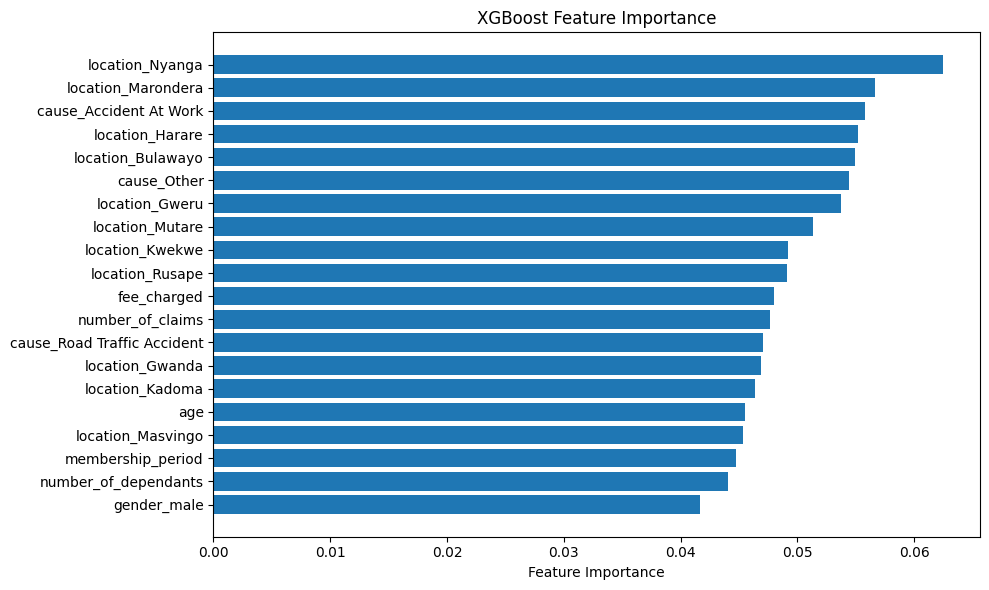

In [ ]:
# 특성 중요도 시각화
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Logistic Regression 모델
*전체 정확도 88%*

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
langchain 0.3.18 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
Logistic Regression Model Performance:
  

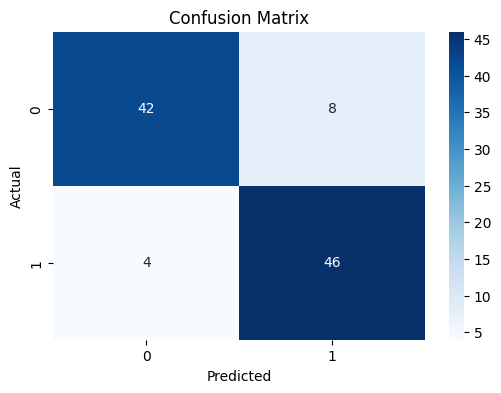

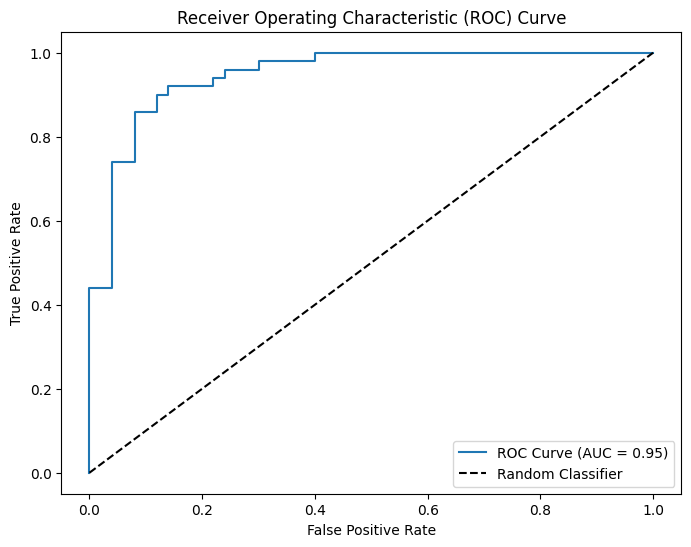

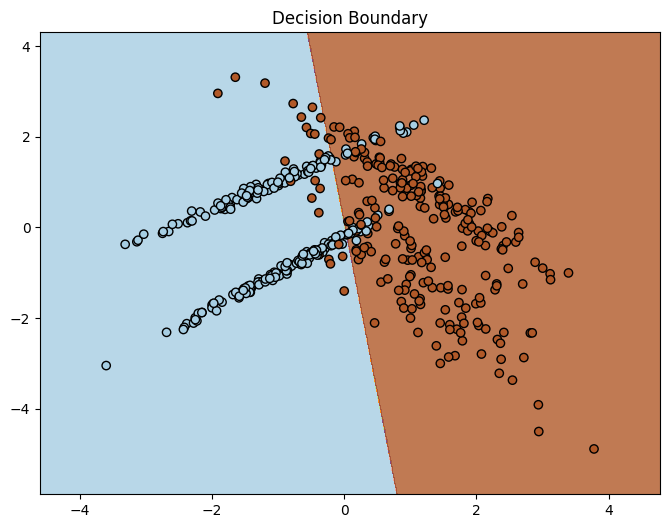

In [ ]:
# 필요한 라이브러리 설치
!pip install numpy>=1.24.0 pandas>=2.2.0 scikit-learn>=1.3.1 matplotlib>=3.8.0 seaborn>=0.12.0 --force-reinstall

# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

# 데이터셋 생성 (실제 데이터 대체)
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# 성능 출력
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_lr))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC 곡선 및 AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# 결정 경계 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Decision Boundary")
plt.show()


# Performance Issue
지난번 제작한 자동차 보험사기 모델에서는 XG Boost가 가장 높은 정확도를 보였는데 이번엔 아니다.
그 둘의 차이점이 뭔지 아는게 공부에 도움이 될 듯

데이터 전처리가 부족한가????

## 공부 해보니 이런 데이터 불균형이 있는 사기 탐지 모델은 LightGBM이 좋다네요



# LightGBM 모델
에라이 그래봤자 80%인뎁쇼

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 데이터 분할 (이미 수행했다면 이 단계는 건너뛰세요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 모델 평가
print("LightGBM Model Performance:")
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

LightGBM 특성 중요도

In [ ]:
# 특성 중요도 시각화
feature_importance = lgbm_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

이거 좀 공부하자 : https://lamttic.github.io/2024/03/02/01.html

클래스 불균형에 대한 내용

# flask로 연동하기 위해 pickle 파일로 저장

In [ ]:
import pickle

# 모델 저장 (예: LightGBM 모델 사용)
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# 스케일러 저장
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)